In [24]:
import pandas as pd
import statistics
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
wd = pd.read_csv('data/wine.csv')

In [3]:
wd.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
wd['taster_name'].nunique()

19

In [5]:
round(wd['price'].max())

3300

In [6]:
wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [7]:
display(wd.shape[0])
wd = wd.drop_duplicates()
display(wd.shape[0])

129971

119988

In [8]:
wd.isna().sum()

country                     59
description                  0
designation              34545
points                       0
price                     8395
province                    59
region_1                 19560
region_2                 73219
taster_name              24917
taster_twitter_handle    29446
title                        0
variety                      1
winery                       0
dtype: int64

In [9]:
profile = ProfileReport(wd, title="Wine Pandas Profiling Report")
profile

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


In [10]:
wdc = pd.read_csv('data\wine_cleared.csv')

In [11]:
wdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 12.9+ MB


In [12]:
display(wdc['points'].min())
display(wdc['price'].min())

80

4.0

In [13]:
round(statistics.mean(wdc['price']), 2)
sum(wdc['price'])/len(wdc['price'])

35.36338912999136

In [14]:
display(round(statistics.median(wdc['price']), 2))

28.0

In [15]:
count_price = len(wdc['price'])
sorted_price = sorted(wdc['price'])

if count_price % 2: # нечетное 
    median = sorted_price[count_price//2]
else:
    median = sum(sorted_price[count_price//2 - 1:count_price//2 + 1])/2
    
median
    

28.0

In [16]:
round(statistics.mode(wdc['price']), 2)

35.36

In [20]:
wdc.corr('pearson')

,Unnamed: 0,points,price
Unnamed: 0,1.000000,0.007124,0.004652
points,0.007124,1.000000,0.402137
price,0.004652,0.402137,1.000000


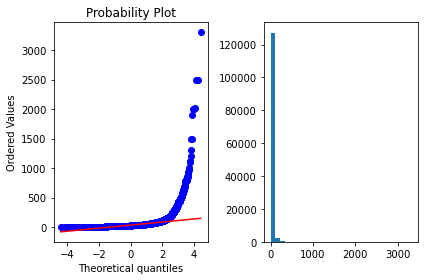

In [39]:
plt.subplot(1,2,1)
stats.probplot(wdc['price'],plot=plt);

plt.subplot(1,2,2)
plt.hist(wdc['price'], bins=30);

plt.tight_layout()

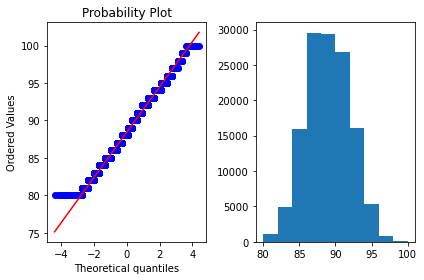

In [41]:
plt.subplot(1,2,1)
stats.probplot(wdc['points'], plot=plt)

plt.subplot(1,2,2)
plt.hist(wdc['points'])

plt.tight_layout()

In [44]:
wdc.corr(method='spearman')

,Unnamed: 0,points,price
Unnamed: 0,1.000000,0.009378,0.003751
points,0.009378,1.000000,0.581095
price,0.003751,0.581095,1.000000


In [45]:
wdc.corr(method='kendall')

,Unnamed: 0,points,price
Unnamed: 0,1.000000,0.006536,0.002533
points,0.006536,1.000000,0.433498
price,0.002533,0.433498,1.000000


In [51]:
from sklearn.metrics import matthews_corrcoef
import seaborn as sns

In [47]:
x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

matthews_corrcoef(x, y) # рассчитаем коэффициент корреляции Мэтьюса

-0.3333333333333333

In [48]:
md = pd.read_csv('data\model.csv')

In [49]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      662 non-null    object 
 1   Year       662 non-null    int64  
 2   Waist      662 non-null    float64
 3   Hips       662 non-null    float64
 4   Height     662 non-null    float64
 5   Weight     662 non-null    float64
 6   BMI        662 non-null    float64
 7   Waist/Hip  662 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 41.5+ KB


In [50]:
md.corr()

,Year,Waist,Hips,Height,Weight,BMI,Waist/Hip
Year,1.000000,0.292518,-0.281576,0.284482,-0.010753,0.025309,0.458945
Waist,0.292518,1.000000,0.283060,0.372637,0.452704,0.136549,0.742284
Hips,-0.281576,0.283060,1.000000,0.228054,0.541836,0.211395,-0.422412
Height,0.284482,0.372637,0.228054,1.000000,0.706569,-0.037934,0.198754
Weight,-0.010753,0.452704,0.541836,0.706569,1.000000,0.212701,0.067543
BMI,0.025309,0.136549,0.211395,-0.037934,0.212701,1.000000,-0.010173
Waist/Hip,0.458945,0.742284,-0.422412,0.198754,0.067543,-0.010173,1.000000


<AxesSubplot:>

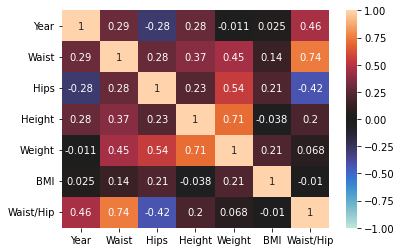

In [56]:
sns.heatmap(md.corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0)

<AxesSubplot:xlabel='Waist/Hip', ylabel='Waist'>

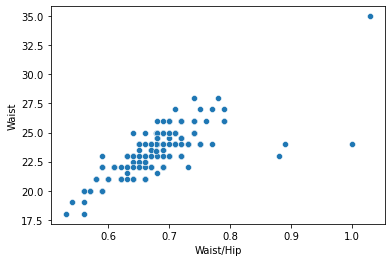

In [57]:
sns.scatterplot(
    data=md,
    x="Waist/Hip", 
    y="Waist"
)

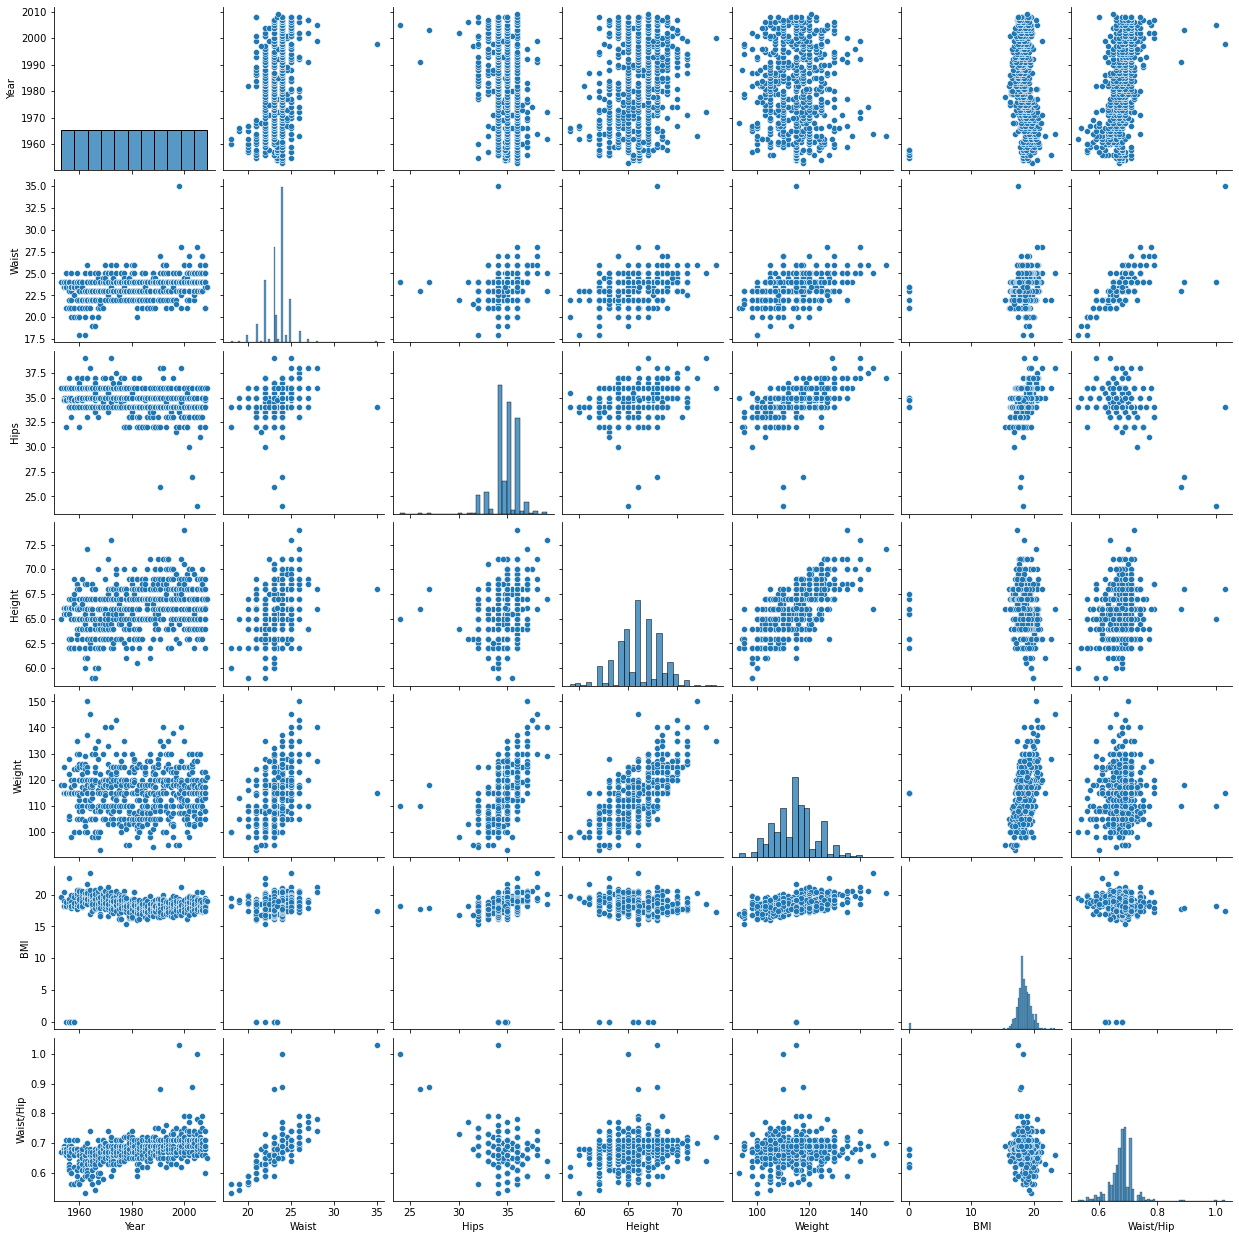

In [58]:
sns.pairplot(md)

In [59]:
md[['Weight','Height']].corr()

,Weight,Height
Weight,1.000000,0.706569
Height,0.706569,1.000000
